In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.set_index('customerID',inplace=True)

we have 7043 row of data, 19 features and 1 label

# DATA PRE PROCESSING

In [6]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we have no missing values in the feature

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(7021, 20)

we had 22 duplicate rows which have now been dropped

In [9]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null 

total charges should be float and is object so we need to convert it from object to float

In [11]:
data['TotalCharges'].replace({' ':np.nan},inplace=True)

In [12]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(7010, 20)

In [15]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null 

In [17]:
cat_data = data.select_dtypes('object').columns.tolist()

In [18]:
cont_data = data.select_dtypes(['int64','float64']).columns.tolist()

In [19]:
cat_data

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [20]:
cat_data.remove('Churn')

In [21]:
cont_data

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# EDA

In [22]:
for i in data[cat_data]:
    print(f'{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n')

2
Male      3535
Female    3475
Name: gender, dtype: int64

2
No     3617
Yes    3393
Name: Partner, dtype: int64

2
No     4911
Yes    2099
Name: Dependents, dtype: int64

2
Yes    6330
No      680
Name: PhoneService, dtype: int64

3
No                  3363
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

3
Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64

3
No                     3489
Yes                    2015
No internet service    1506
Name: OnlineSecurity, dtype: int64

3
No                     3079
Yes                    2425
No internet service    1506
Name: OnlineBackup, dtype: int64

3
No                     3086
Yes                    2418
No internet service    1506
Name: DeviceProtection, dtype: int64

3
No                     3464
Yes                    2040
No internet service    1506
Name: TechSupport, dtype: int64

3
No                     2801
Yes                    2703
No internet s

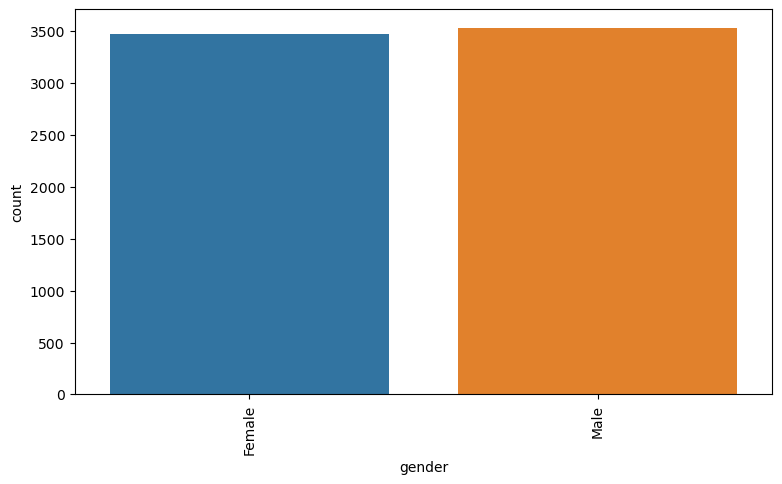

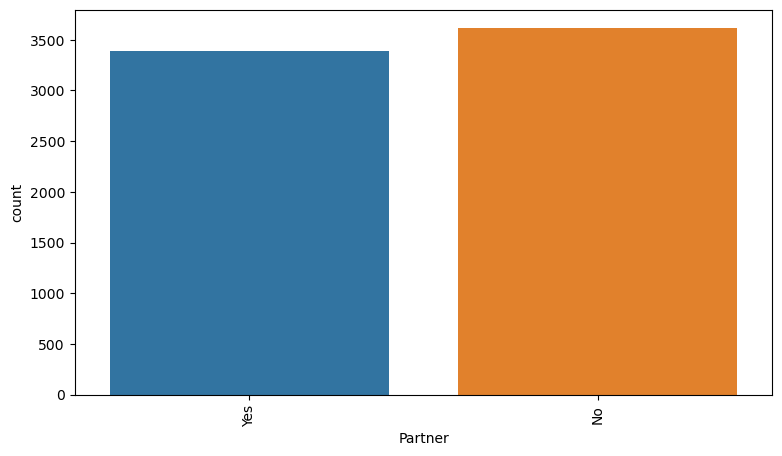

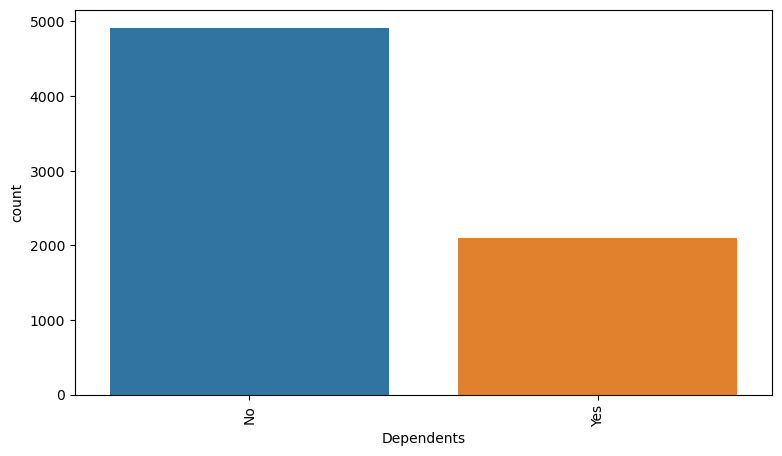

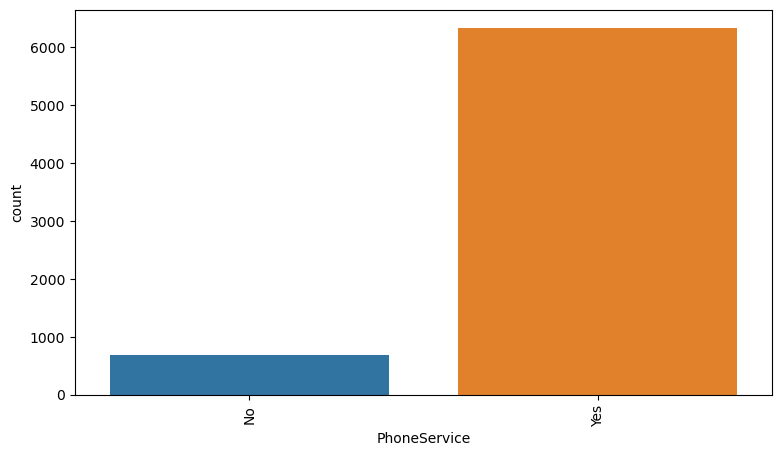

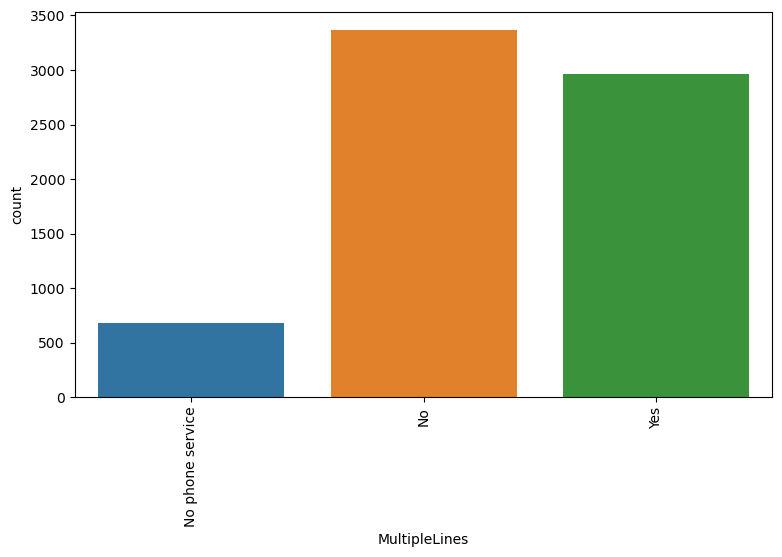

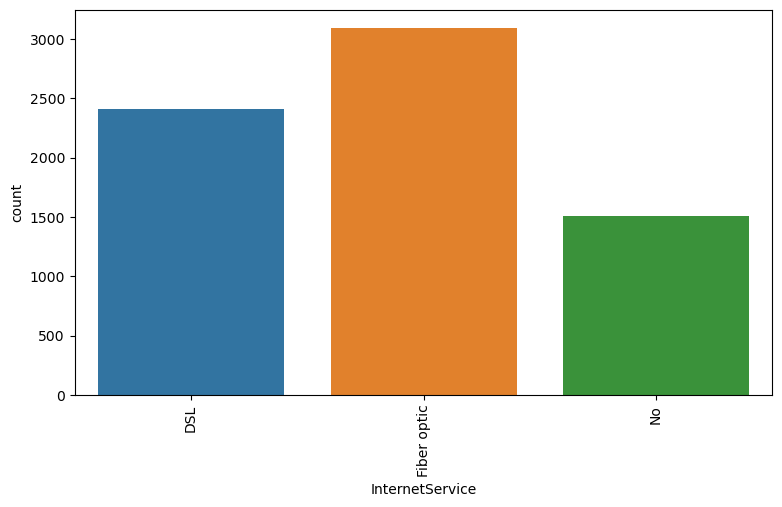

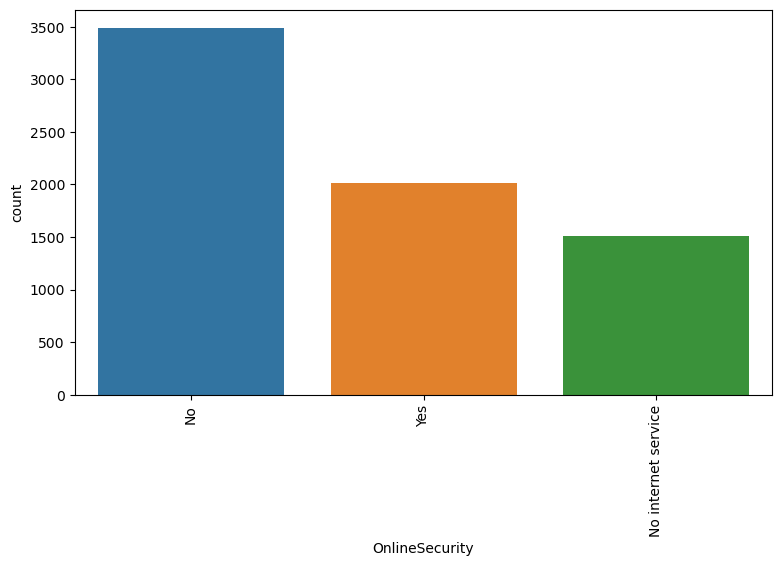

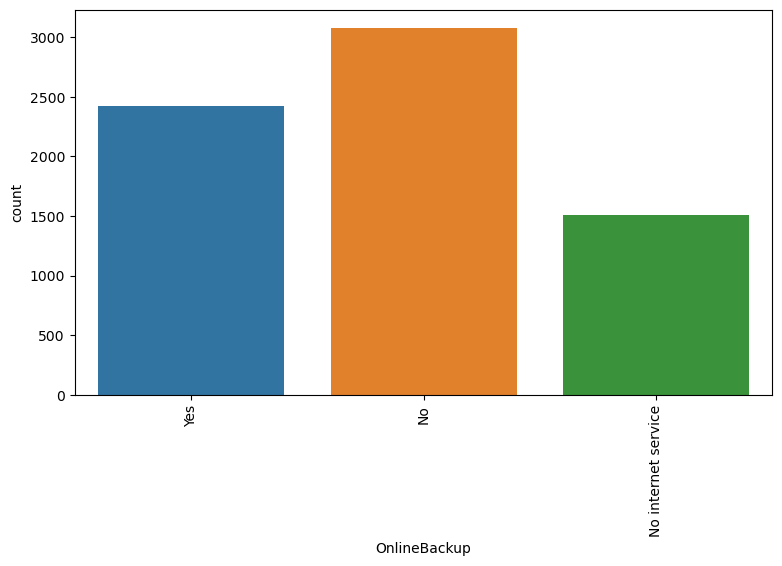

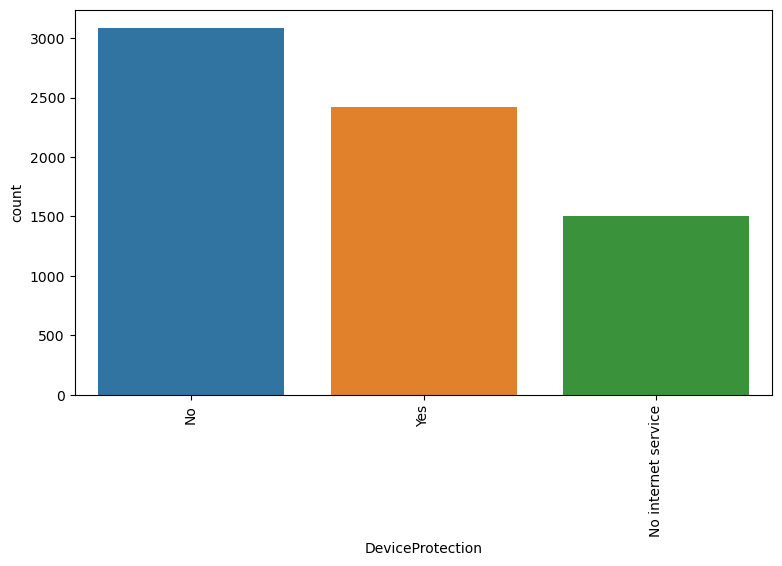

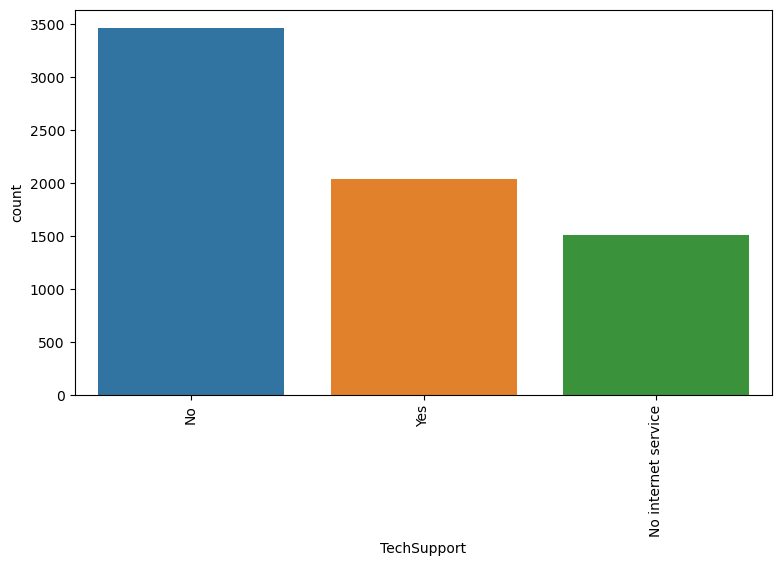

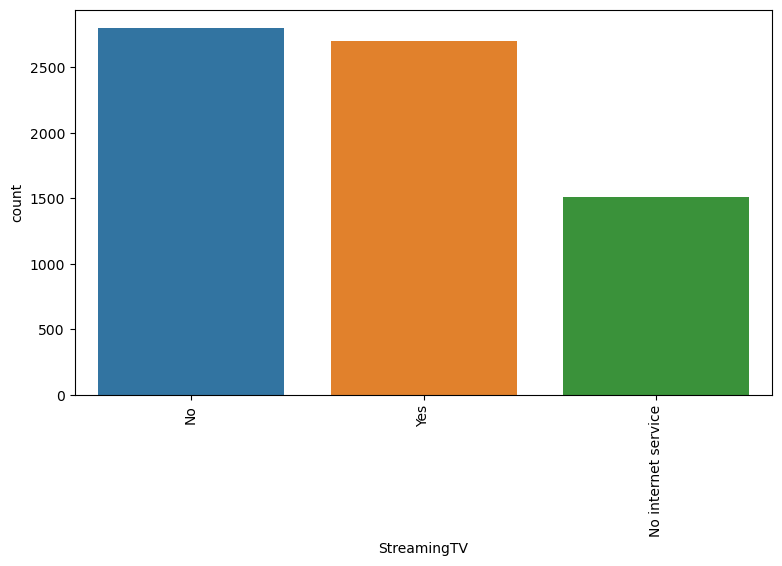

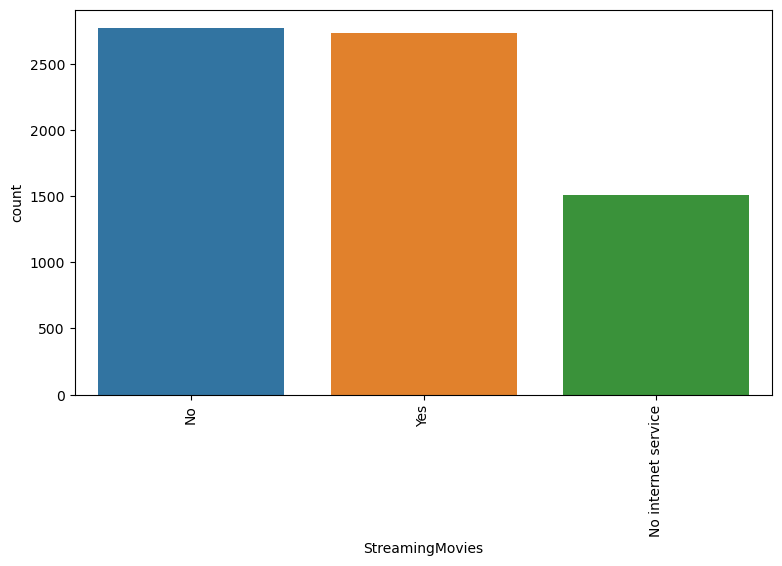

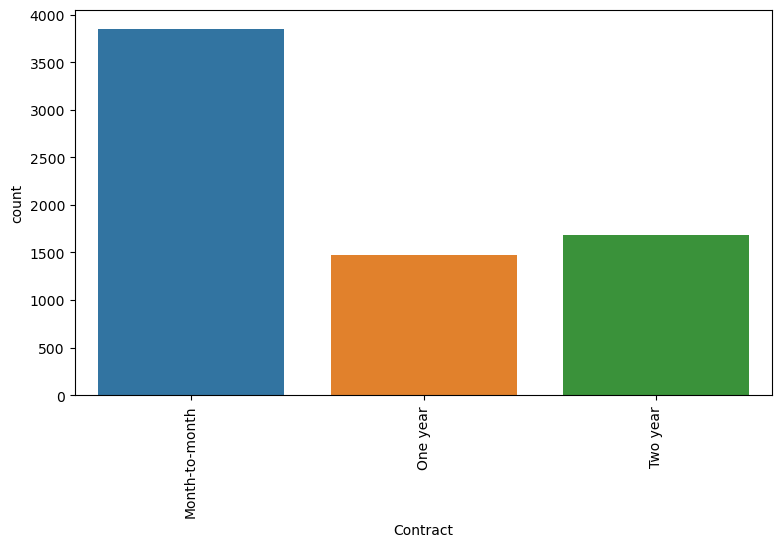

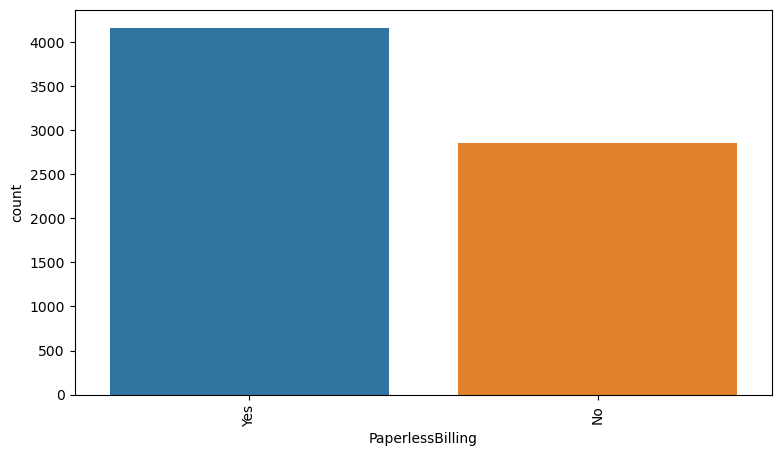

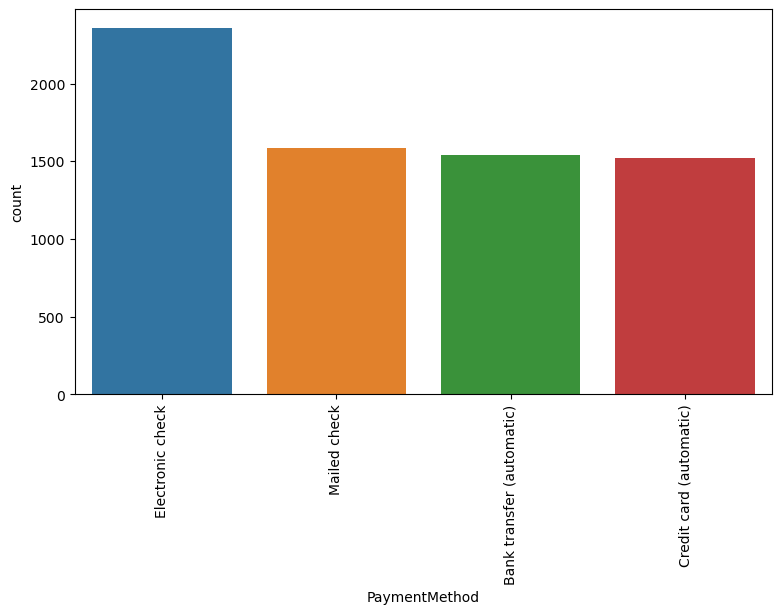

In [23]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

most of the user prefer electronic check as the payment method

most of the user prefeer paperless billing

most of the user renew their plan every month

most of the user dont use onlinebackup service ,TechSupport and online security

most of the user have optic lines

most of the users dont have multiple lines

most of the users use telephone service

most ot the users dont have dependents



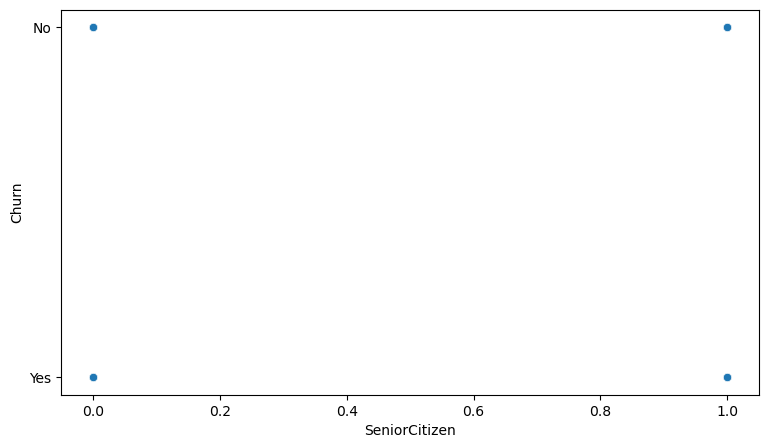

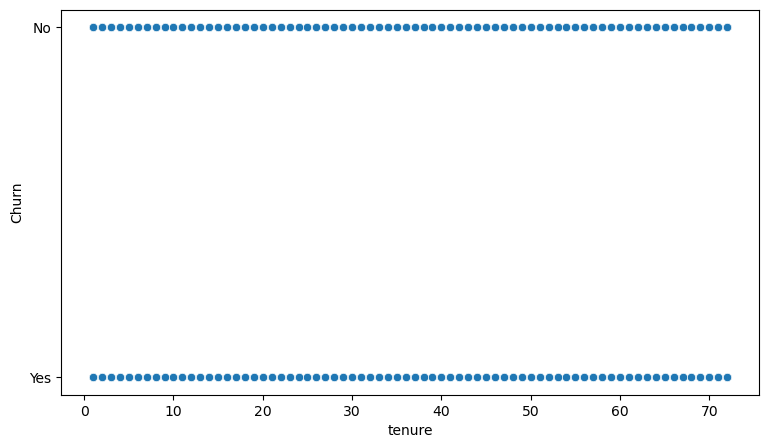

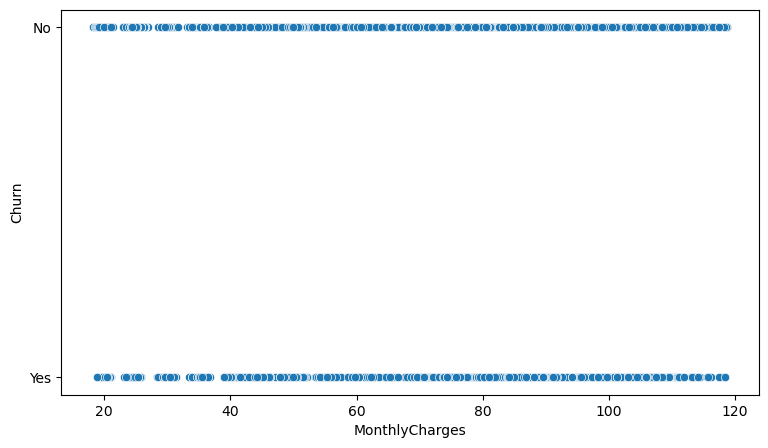

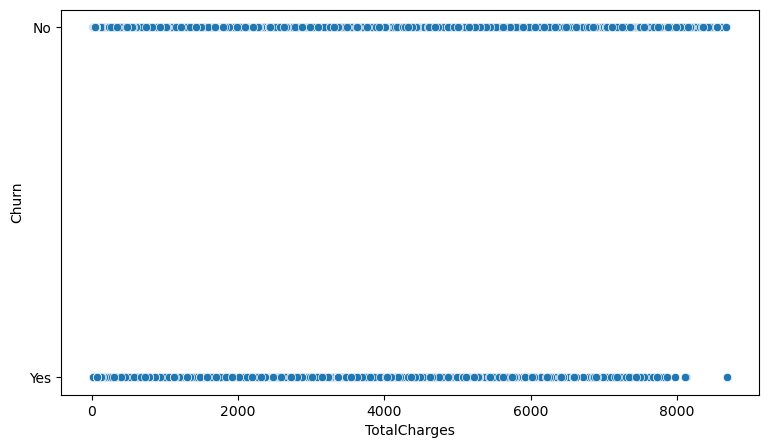

In [24]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['Churn'])
    plt.xlabel(i)
    plt.show()

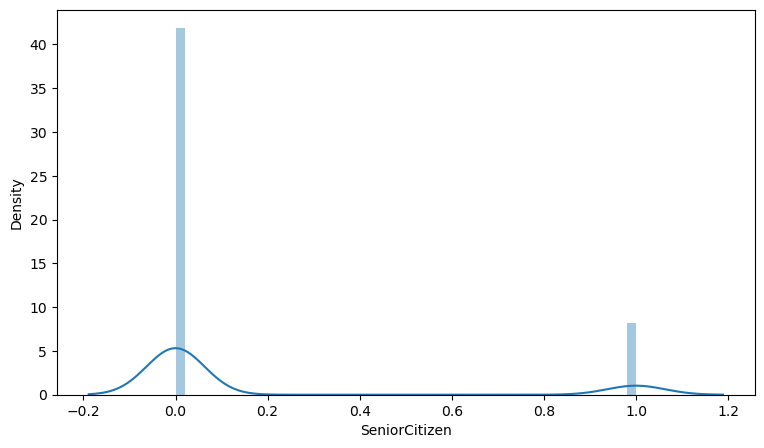

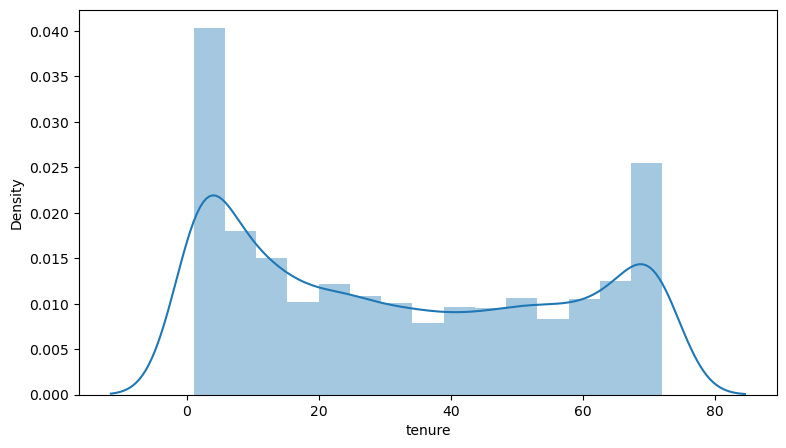

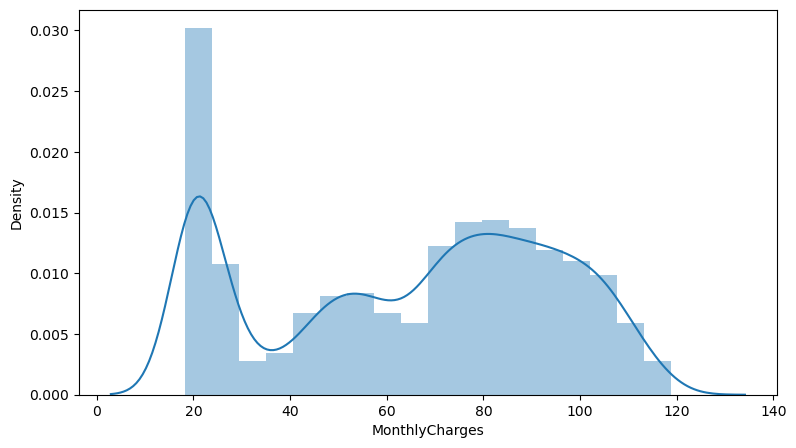

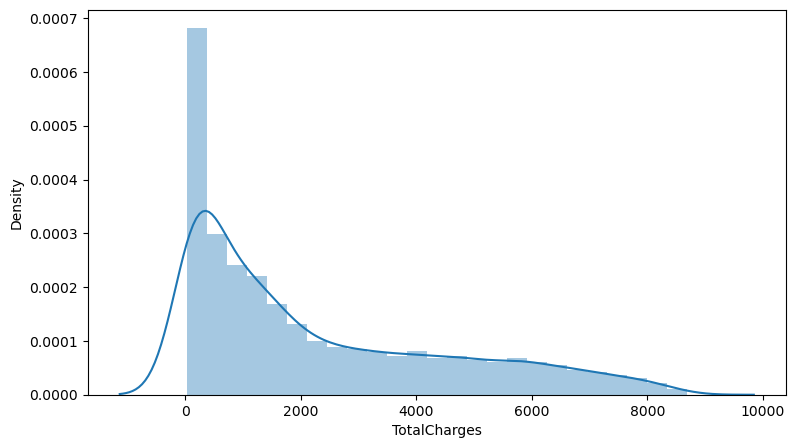

In [25]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()

senior citizen is discrete value 

totalcharges,monthlycharges and tenure are not normally distributed

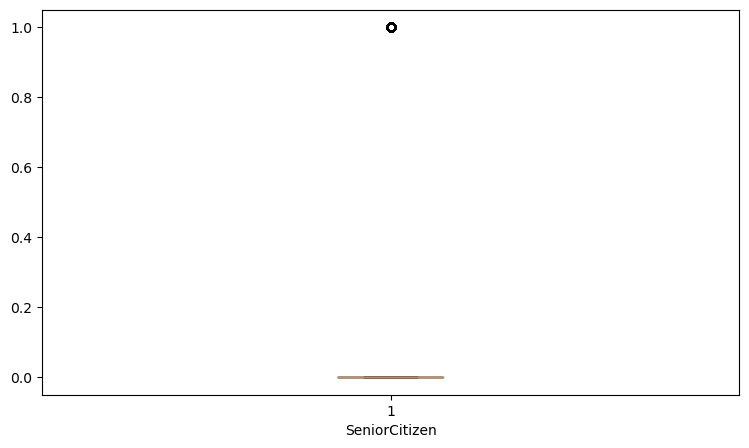

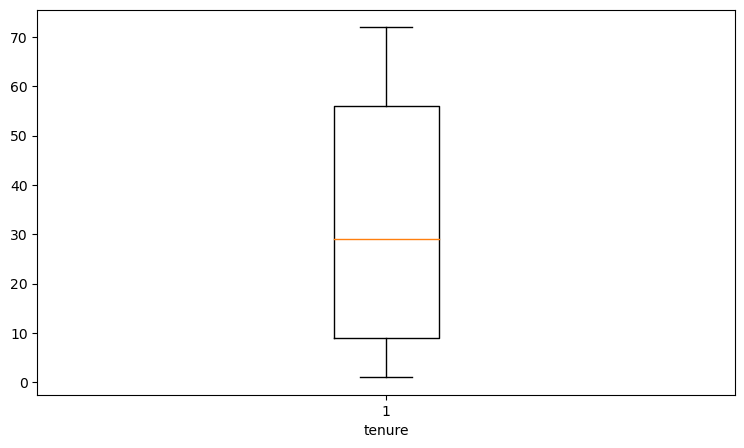

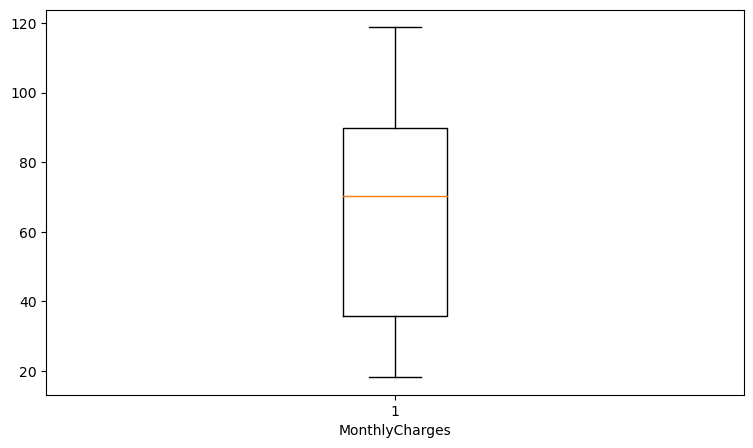

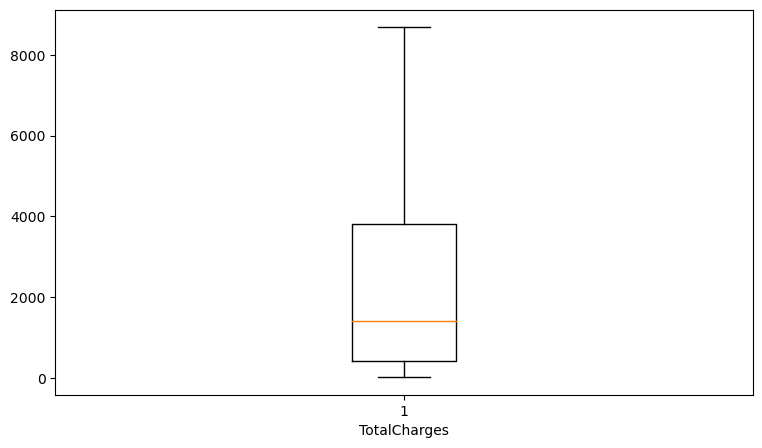

In [26]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()

no outliers present in the contionus feature

In [27]:
cont_data.remove('SeniorCitizen')

# FEATURE SELECTION

In [28]:
le = LabelEncoder()

In [29]:
data['Churn'] = le.fit_transform(data['Churn'])

In [30]:
data['Churn'].nunique()

2

In [31]:
data['Churn'].value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

data set is not balanced

In [32]:
data.corr()['Churn'].sort_values()

tenure           -0.353339
TotalCharges     -0.198362
SeniorCitizen     0.151270
MonthlyCharges    0.194008
Churn             1.000000
Name: Churn, dtype: float64

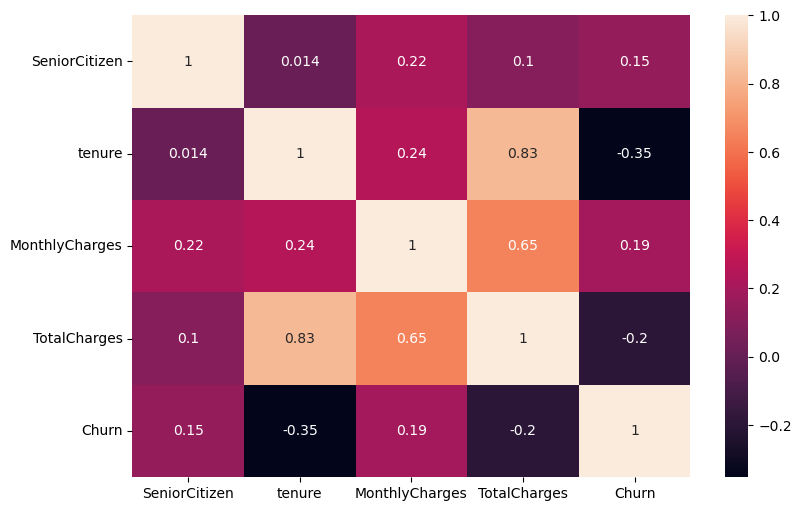

In [33]:
plt.figure(figsize=(9,6))

sns.heatmap(data.corr(),annot=True)

plt.show()

no feature co-relation problem

# Scaling and Transformation

In [34]:
dd = pd.get_dummies(data[cat_data])

In [35]:
data = pd.concat([data,dd],axis=1)

In [36]:
data.shape

(7010, 61)

In [37]:
data.drop(cat_data,axis=1,inplace=True)

In [38]:
data.shape

(7010, 46)

In [39]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [40]:
data[cont_data].skew().sort_values()

MonthlyCharges   -0.225686
tenure            0.233740
TotalCharges      0.958322
dtype: float64

In [41]:
pt = PowerTransformer()

In [42]:
ss = StandardScaler()

In [43]:
x = data.drop('Churn',axis=1)

y = data['Churn']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=98)

In [45]:
x_train[cont_data] = pt.fit_transform(x_train[cont_data])

In [46]:
x_test[cont_data] = pt.transform(x_test[cont_data])

applying power transformer to reduce skewness in the data

In [47]:
x_train[cont_data] = ss.fit_transform(x_train[cont_data])

In [48]:
x_test[cont_data] = ss.transform(x_test[cont_data])

applying standard scaler to make data nomrally distributed

# Over SAMPLING

In [49]:
sm = SMOTE()

In [50]:
x_train,y_train = sm.fit_resample(x_train,y_train)

In [51]:
y_train.value_counts()

0    4125
1    4125
Name: Churn, dtype: int64

# LR

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
pred1 = lr.predict(x_train)

In [55]:
pred2 = lr.predict(x_test)

In [56]:
print(f'Train Score:{accuracy_score(y_train,pred1)}')

Train Score:0.8511515151515151


In [57]:
print(f'Test Score:{accuracy_score(y_test,pred2)}')

Test Score:0.8002853067047075


In [58]:
a1 = accuracy_score(y_train,pred1)

In [59]:
a2 = accuracy_score(y_test,pred2)

In [60]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1028
           1       0.62      0.64      0.63       374

    accuracy                           0.80      1402
   macro avg       0.74      0.75      0.75      1402
weighted avg       0.80      0.80      0.80      1402



In [61]:
print(confusion_matrix(y_test,pred2))

[[882 146]
 [134 240]]


In [62]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.8045649072753209

# KNN

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
pred3 = knn.predict(x_train)

In [66]:
pred4 = knn.predict(x_test)

In [67]:
print(f'Train Score:{accuracy_score(y_train,pred3)}')

Train Score:0.892


In [68]:
print(f'Test Score:{accuracy_score(y_test,pred4)}')

Test Score:0.7446504992867332


In [69]:
a4 = accuracy_score(y_train,pred3)

In [70]:
a5 = accuracy_score(y_test,pred4)

In [71]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82      1028
           1       0.52      0.67      0.58       374

    accuracy                           0.74      1402
   macro avg       0.69      0.72      0.70      1402
weighted avg       0.77      0.74      0.75      1402



In [72]:
print(confusion_matrix(y_test,pred4))

[[794 234]
 [124 250]]


In [73]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.7604850213980029

# DT

In [74]:
dt = DecisionTreeClassifier()

In [75]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
pred5 = dt.predict(x_train)

In [77]:
pred6 = dt.predict(x_test)

In [78]:
print(f'Train Score:{accuracy_score(y_train,pred5)}')

Train Score:0.9986666666666667


In [79]:
print(f'Test Score:{accuracy_score(y_test,pred6)}')

Test Score:0.7097004279600571


In [80]:
a7 = accuracy_score(y_train,pred5)

In [81]:
a8 = accuracy_score(y_test,pred6)

In [82]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1028
           1       0.46      0.52      0.49       374

    accuracy                           0.71      1402
   macro avg       0.64      0.65      0.64      1402
weighted avg       0.72      0.71      0.71      1402



In [83]:
print(confusion_matrix(y_test,pred6))

[[801 227]
 [180 194]]


In [84]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.7285306704707561

# RF

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
pred7 = rf.predict(x_train)

In [88]:
pred8 = rf.predict(x_test)

In [89]:
print(f'Train Score:{accuracy_score(y_train,pred7)}')

Train Score:0.9986666666666667


In [90]:
print(f'Test Score:{accuracy_score(y_test,pred8)}')

Test Score:0.7881597717546363


In [91]:
a10 = accuracy_score(y_train,pred7)

In [92]:
a11 = accuracy_score(y_test,pred8)

In [93]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1028
           1       0.61      0.58      0.59       374

    accuracy                           0.79      1402
   macro avg       0.73      0.72      0.72      1402
weighted avg       0.78      0.79      0.79      1402



In [94]:
print(confusion_matrix(y_test,pred8))

[[889 139]
 [158 216]]


In [95]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.7868758915834522

# ada

In [96]:
ada = AdaBoostClassifier()

In [97]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [98]:
pred9 = ada.predict(x_train)

In [99]:
pred10 = ada.predict(x_test)

In [100]:
print(f'Train Score:{accuracy_score(y_train,pred9)}')

Train Score:0.810060606060606


In [101]:
print(f'Test Score:{accuracy_score(y_test,pred10)}')

Test Score:0.7767475035663338


In [102]:
a13 =  accuracy_score(y_train,pred9)

In [103]:
a14 = accuracy_score(y_test,pred10)

In [104]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1028
           1       0.56      0.79      0.65       374

    accuracy                           0.78      1402
   macro avg       0.73      0.78      0.74      1402
weighted avg       0.82      0.78      0.79      1402



In [105]:
print(confusion_matrix(y_test,pred10))

[[794 234]
 [ 79 295]]


In [106]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.8048502139800287

# GBDT

In [107]:
gb = GradientBoostingClassifier()

In [108]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [109]:
pred11 = gb.predict(x_train)

In [110]:
pred12 = gb.predict(x_test)

In [111]:
print(f'Train Score:{accuracy_score(y_train,pred11)}')

Train Score:0.8521212121212122


In [112]:
print(f'Test Score:{accuracy_score(y_test,pred12)}')

Test Score:0.7860199714693296


In [113]:
a16 = accuracy_score(y_train,pred11)

In [114]:
a17 = accuracy_score(y_test,pred12)

In [115]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1028
           1       0.58      0.70      0.63       374

    accuracy                           0.79      1402
   macro avg       0.73      0.76      0.74      1402
weighted avg       0.80      0.79      0.79      1402



In [116]:
print(confusion_matrix(y_test,pred12))

[[842 186]
 [114 260]]


In [117]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.8041369472182597

# XGBOOST

In [118]:
xg = XGBClassifier()

In [119]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
pred13 = xg.predict(x_train)

In [121]:
pred14 = xg.predict(x_test)

In [122]:
print(f'Train Score:{accuracy_score(y_train,pred13)}')

Train Score:0.9518787878787879


In [123]:
print(f'Test Score:{accuracy_score(y_test,pred14)}')

Test Score:0.7774607703281027


In [124]:
a19 = accuracy_score(y_train,pred13)

In [125]:
a20 = accuracy_score(y_test,pred14)

In [126]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1028
           1       0.59      0.56      0.57       374

    accuracy                           0.78      1402
   macro avg       0.71      0.71      0.71      1402
weighted avg       0.77      0.78      0.78      1402



In [127]:
print(confusion_matrix(y_test,pred14))

[[879 149]
 [163 211]]


In [128]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.7841654778887304

# SVM

In [129]:
svm = SVC()

In [130]:
svm.fit(x_train,y_train)

SVC()

In [131]:
pred15 = svm.predict(x_train)

In [132]:
pred16 = svm.predict(x_test)

In [133]:
print(f'Train Score:{accuracy_score(y_train,pred15)}')

Train Score:0.8682424242424243


In [134]:
print(f'Test Score:{accuracy_score(y_test,pred16)}')

Test Score:0.7960057061340942


In [135]:
a22 = accuracy_score(y_train,pred15)

In [136]:
a23 = accuracy_score(y_test,pred16)

In [137]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1028
           1       0.61      0.64      0.63       374

    accuracy                           0.80      1402
   macro avg       0.74      0.75      0.74      1402
weighted avg       0.80      0.80      0.80      1402



In [138]:
print(confusion_matrix(y_test,pred16))

[[876 152]
 [134 240]]


In [139]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.7350927246790301

In [140]:
train = []
test = []
cv = []

In [141]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [142]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [143]:
result = pd.DataFrame({'MODELS':model,'TRAIN RESULT':train,'TEST RESULT':test,'CV SCORE':cv})

In [144]:
result

,MODELS,TRAIN RESULT,TEST RESULT,CV SCORE
0,LR,0.851152,0.800285,0.804565
1,KNN,0.892000,0.744650,0.760485
2,DT,0.998667,0.709700,0.728531
3,RF,0.998667,0.788160,0.786876
4,ADA,0.810061,0.776748,0.804850
5,GBDT,0.852121,0.786020,0.804137
6,XGBOOST,0.951879,0.777461,0.784165
7,SVM,0.868242,0.796006,0.735093


we need high precision for (0:no) so we can select the GBDT MODEL

In [145]:
gb = GradientBoostingClassifier()

In [146]:
para = {'loss':['log_loss', 'deviance', 'exponential'],
       'learning_rate':[0.001,0.01,0.1,1,10],
       'n_estimators':[100,150,200],
       'criterion':['friedman_mse', 'squared_error'],
       'min_samples_split':[2,3,4],
       'min_samples_leaf':[1,2],
       'max_depth':[3,4,5],
       'max_features':['auto', 'sqrt', 'log2']}

In [147]:
gs = GridSearchCV(gb,para,n_jobs=-1)

In [148]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]})

In [149]:
gs.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [150]:
gs.best_estimator_.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_split=4, n_estimators=200)

In [151]:
trainpred = gs.best_estimator_.predict(x_train)

In [152]:
testpred = gs.best_estimator_.predict(x_test)

In [153]:
print(f'Train Score:{accuracy_score(y_train,trainpred)}')

Train Score:0.9024242424242425


In [154]:
print(f'Test Score:{accuracy_score(y_test,testpred)}')

Test Score:0.7881597717546363


In [155]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1028
           1       0.60      0.63      0.61       374

    accuracy                           0.79      1402
   macro avg       0.73      0.74      0.73      1402
weighted avg       0.79      0.79      0.79      1402



In [156]:
print(confusion_matrix(y_test,testpred))

[[869 159]
 [138 236]]


In [157]:
cv = cross_val_score(gs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.7910128388017119

In [158]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

In [159]:
roc_auc_score(y_test,testpred)

0.7381733910401796

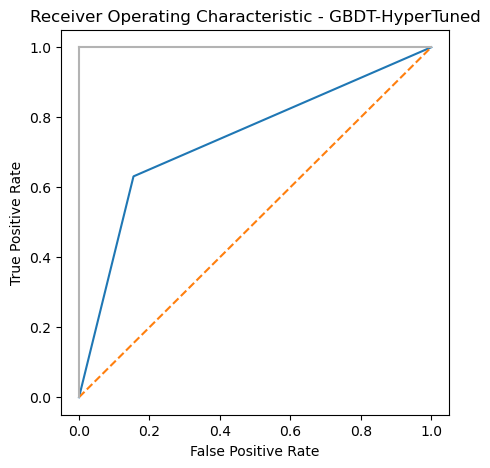

In [160]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - GBDT-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
conclusion = pd.DataFrame({'ACTUAL':y_test,'PREDICTED':testpred})

In [162]:
conclusion

,ACTUAL,PREDICTED
customerID,,
0219-YTZUE,1,1
0754-UKWQP,1,1
7445-WMRBW,0,0
8822-KNBHV,0,0
2338-BQEZT,0,0
...,...,...
1998-VHJHK,0,0
6060-QBMGV,0,0
2560-WBWXF,0,0


In [163]:
pickle.dump(gs.best_estimator_,open('churn.pkl','wb'))